In [28]:
import numpy as np
import os
import utils
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

In [36]:
# load response 
question_type = 'ode'
json_name = 'gpt4o'
json_path = f'results/LLM_word_problems/{question_type}/{question_type}_{json_name}.json'
        
if os.path.exists(json_path):
    problem_response = utils.read_json(json_path)

In [37]:
# fetch subdomain
def count_subdomains(problem_response):
    # Extract subdomain seeds and count their occurrences
    subdomain_seeds = [details['subdomain_seed'] for details in problem_response.values() if 'subdomain_seed' in details]
    subdomain_counts = dict(Counter(subdomain_seeds))
    
    return subdomain_counts

subdomain_counts = count_subdomains(problem_response)
print(subdomain_counts)


{'Cooling Systems': 3, 'Rotational Dynamics': 1, 'Electromagnetic Induction': 2, 'Open Channel Flow': 5, 'Gravitational Influence': 1, 'Battery Dynamics': 1, 'Satellite Trajectories': 2, 'Erosion': 2, 'Energy Storage': 1, 'Damped Oscillations': 1, 'Thermal Resistance': 1, 'Tidal Forces': 1, 'Orbital Mechanics': 1, 'Fluid Flow': 1, 'Thermal Conductivity': 1, 'Groundwater': 1, 'Hydrodynamics': 1, 'Spray Dynamics': 1, 'Asteroid Deflection': 1, 'Celestial Motion': 1, 'Turbulence': 1}


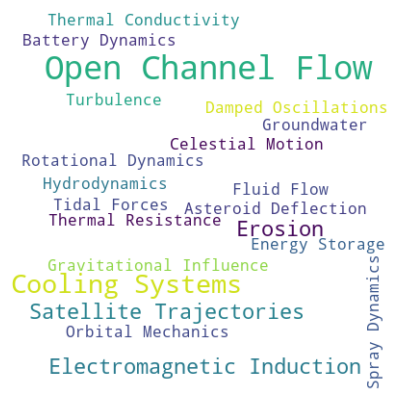

In [38]:
# Generate the word cloud using the subdomain frequencies
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(subdomain_counts)

# Plot the word cloud
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title("Subdomain Diversity in Question Batch")
plt.show()


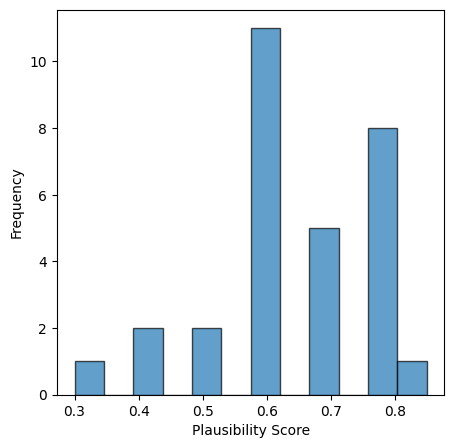

In [51]:
# Function to load JSON and extract plausibility scores
def get_plausibility_scores(problem_response):
    # Extract plausibility scores from each entry
    scores = [float(details['score']) for details in problem_response.values() if 'score' in details]
    
    return scores

def plot_score_distribution(scores):
    plt.figure(figsize=(5, 5))
    plt.hist(scores, bins=12, edgecolor='black', alpha=0.7)
    plt.xlabel('Plausibility Score')
    plt.ylabel('Frequency')
    #plt.title('Distribution of Plausibility Scores')
    plt.show()

def plot_score_stripplot(scores):
    plt.figure(figsize=(5, 2))
    sns.stripplot(x=scores, orient='h')
    plt.xlabel('Plausibility Score')
    #plt.title('Swarm Plot of Plausibility Scores')
    plt.show()

scores = get_plausibility_scores(problem_response)
plot_score_distribution(scores)

# Uncomment the lines above and replace 'subdomain_data.json' with your actual file path to use
